In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import matplotlib.cm as cm
import math
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score


from ipywidgets import interact
import ipywidgets as widgets

import warnings
warnings.simplefilter(action='ignore')

In [2]:
ab_df = pd.read_csv('/content/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',delimiter =';')
ab_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
ab_df.shape

(740, 21)

In [4]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
ab_df['ID'] = ab_df['ID'].astype('category')

ab_df['Reason for absence'] = ab_df['Reason for absence'].replace(0,20)
ab_df['Reason for absence'] = ab_df['Reason for absence'].astype('category')

ab_df['Month of absence'] = ab_df['Month of absence'].replace(0,np.nan)
ab_df['Month of absence'] = ab_df['Month of absence'].astype('category')

ab_df['Day of the week'] = ab_df['Day of the week'].astype('category')
ab_df['Seasons'] = ab_df['Seasons'].astype('category')
ab_df['Disciplinary failure'] = ab_df['Disciplinary failure'].astype('category')
ab_df['Education'] = ab_df['Education'].astype('category')
ab_df['Son'] = ab_df['Son'].astype('category')
ab_df['Social drinker'] = ab_df['Social drinker'].astype('category')
ab_df['Social smoker'] = ab_df['Social smoker'].astype('category')
ab_df['Pet'] = ab_df['Pet'].astype('category')

In [6]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    category
 1   Reason for absence               740 non-null    category
 2   Month of absence                 737 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    category
 12  Educatio

In [7]:
ab_df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   3
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [58]:
ab_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7.0,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7.0,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7.0,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7.0,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7.0,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


## **Exploratory Data Analysis**

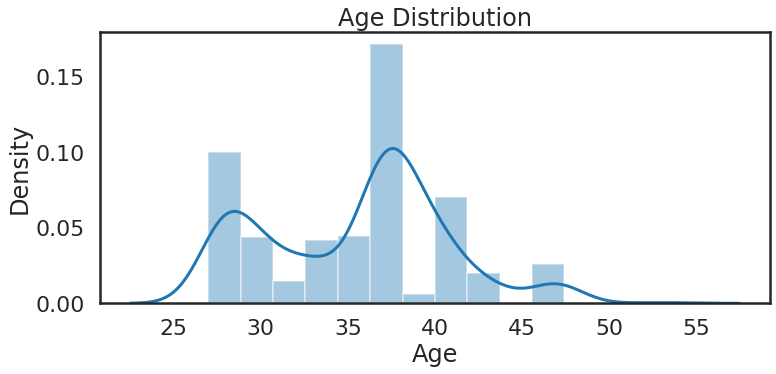

In [43]:
plt.figure(figsize=(12,5))
sns.distplot(ab_df['Age'])
plt.title('Age Distribution');

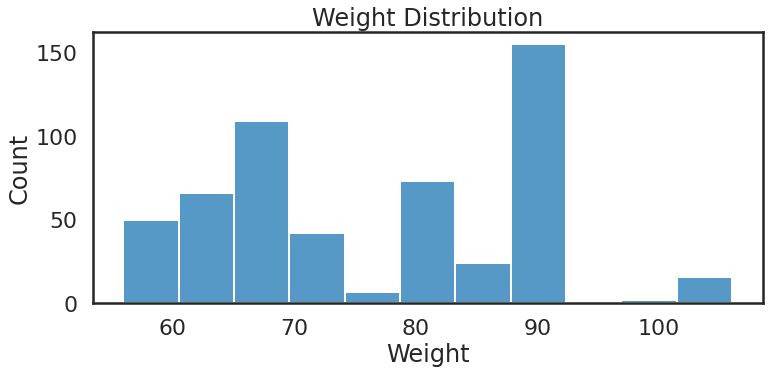

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(ab_df['Weight'])
plt.title('Weight Distribution');

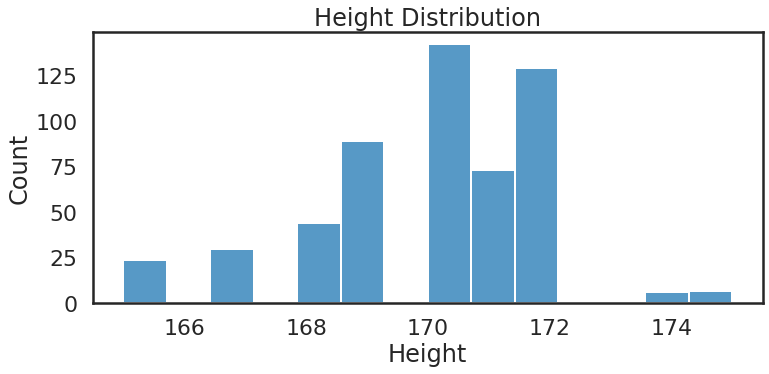

In [45]:
plt.figure(figsize=(12,5))
sns.histplot(ab_df['Height'])
plt.title('Height Distribution');

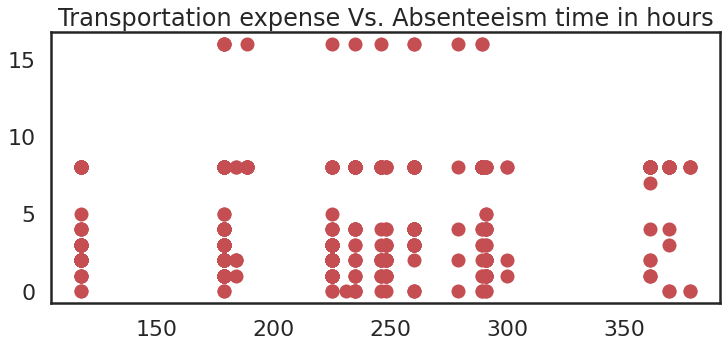

In [47]:
plt.figure(figsize=(12,5))
plt.scatter(ab_df['Transportation expense'],ab_df['Absenteeism time in hours'],color='r')
plt.title('Transportation expense Vs. Absenteeism time in hours');

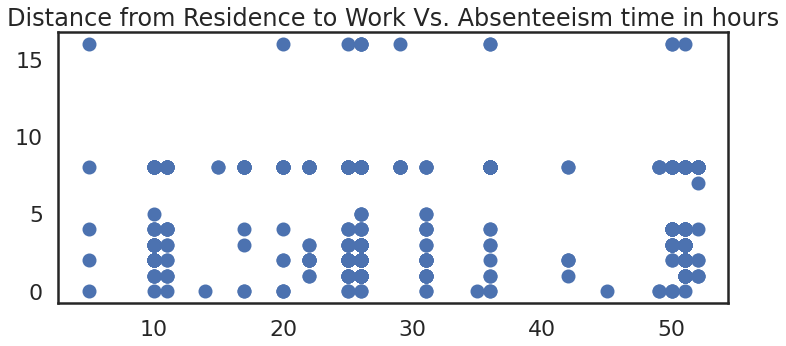

In [48]:
plt.figure(figsize=(12,5))
plt.scatter(ab_df['Distance from Residence to Work'],ab_df['Absenteeism time in hours'],color='b')
plt.title('Distance from Residence to Work Vs. Absenteeism time in hours');

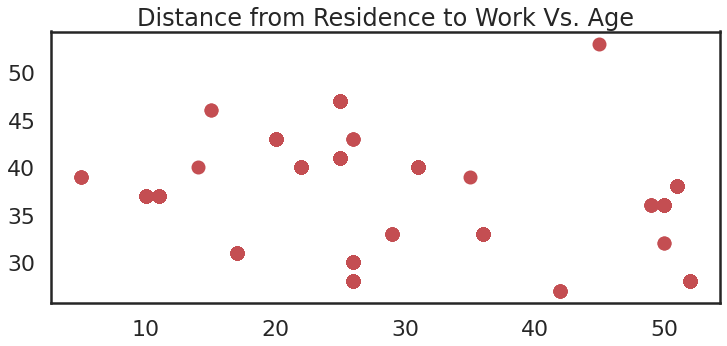

In [49]:
plt.figure(figsize=(12,5))
plt.scatter(ab_df['Distance from Residence to Work'],ab_df['Age'],color='r')
plt.title('Distance from Residence to Work Vs. Age');

In [67]:
cat_var = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

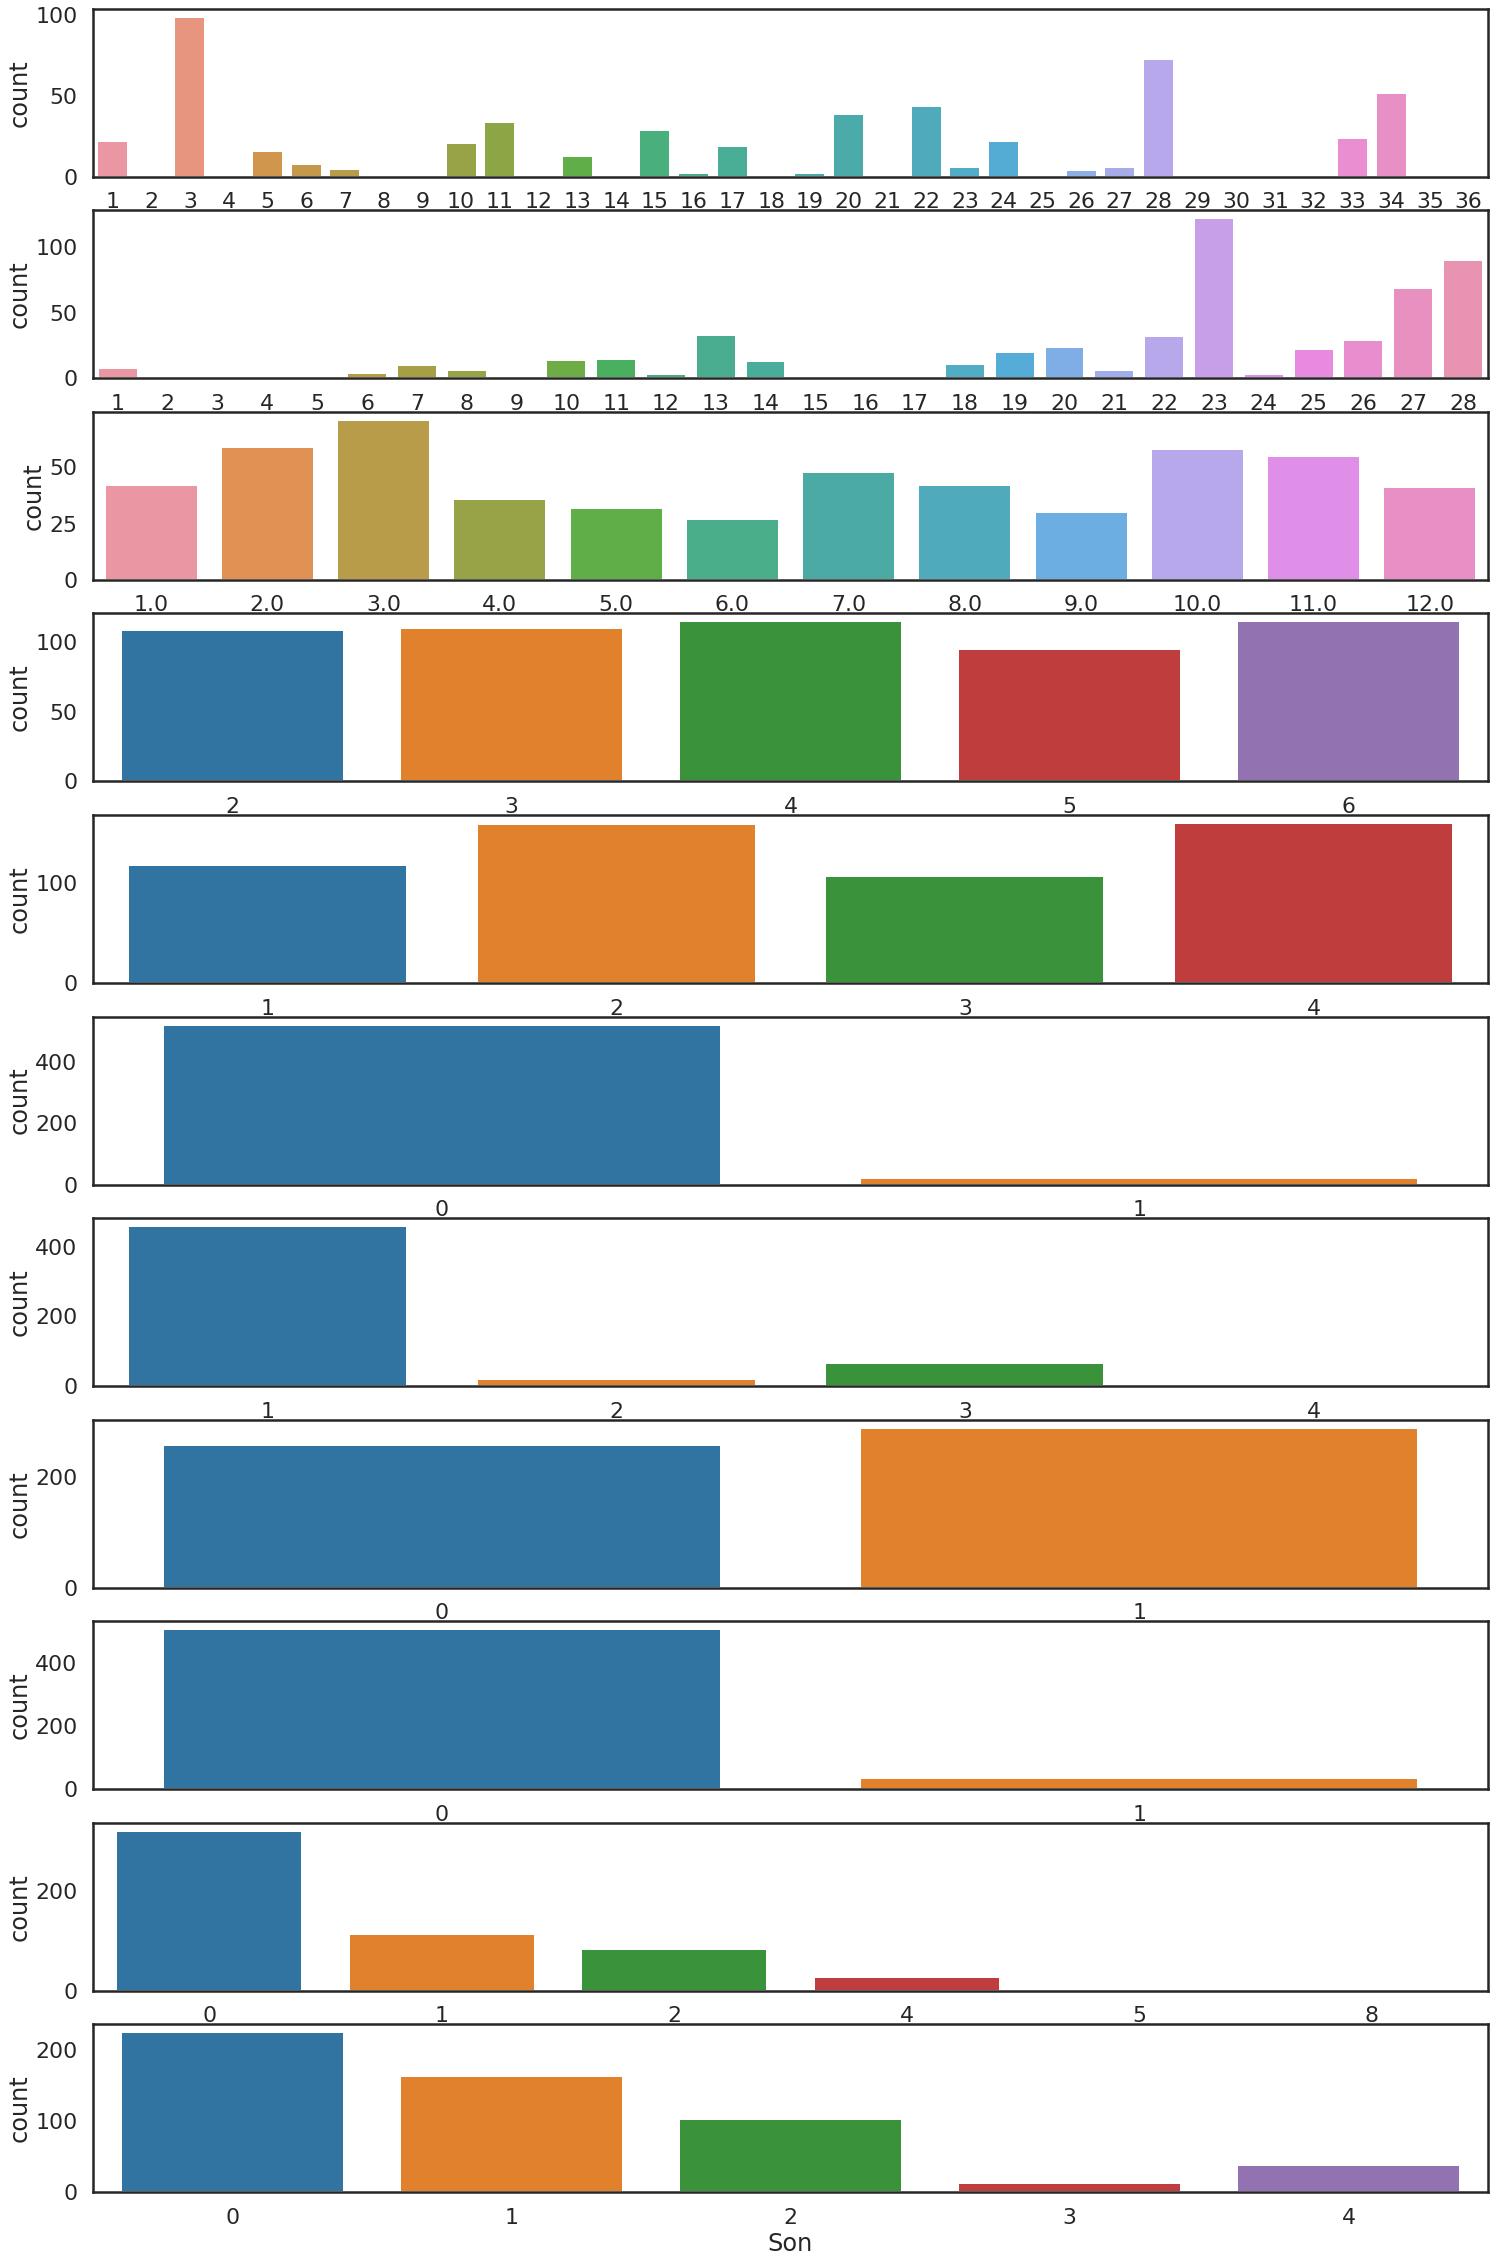

In [68]:
l=list(enumerate(cat_var))
plt.figure(figsize=(25,55))
for x in l:
    plt.subplot(15,1,x[0]+1)
    sns.countplot(x=ab_df[x[1]]) 
    
plt.show()

In [60]:
cont_var = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

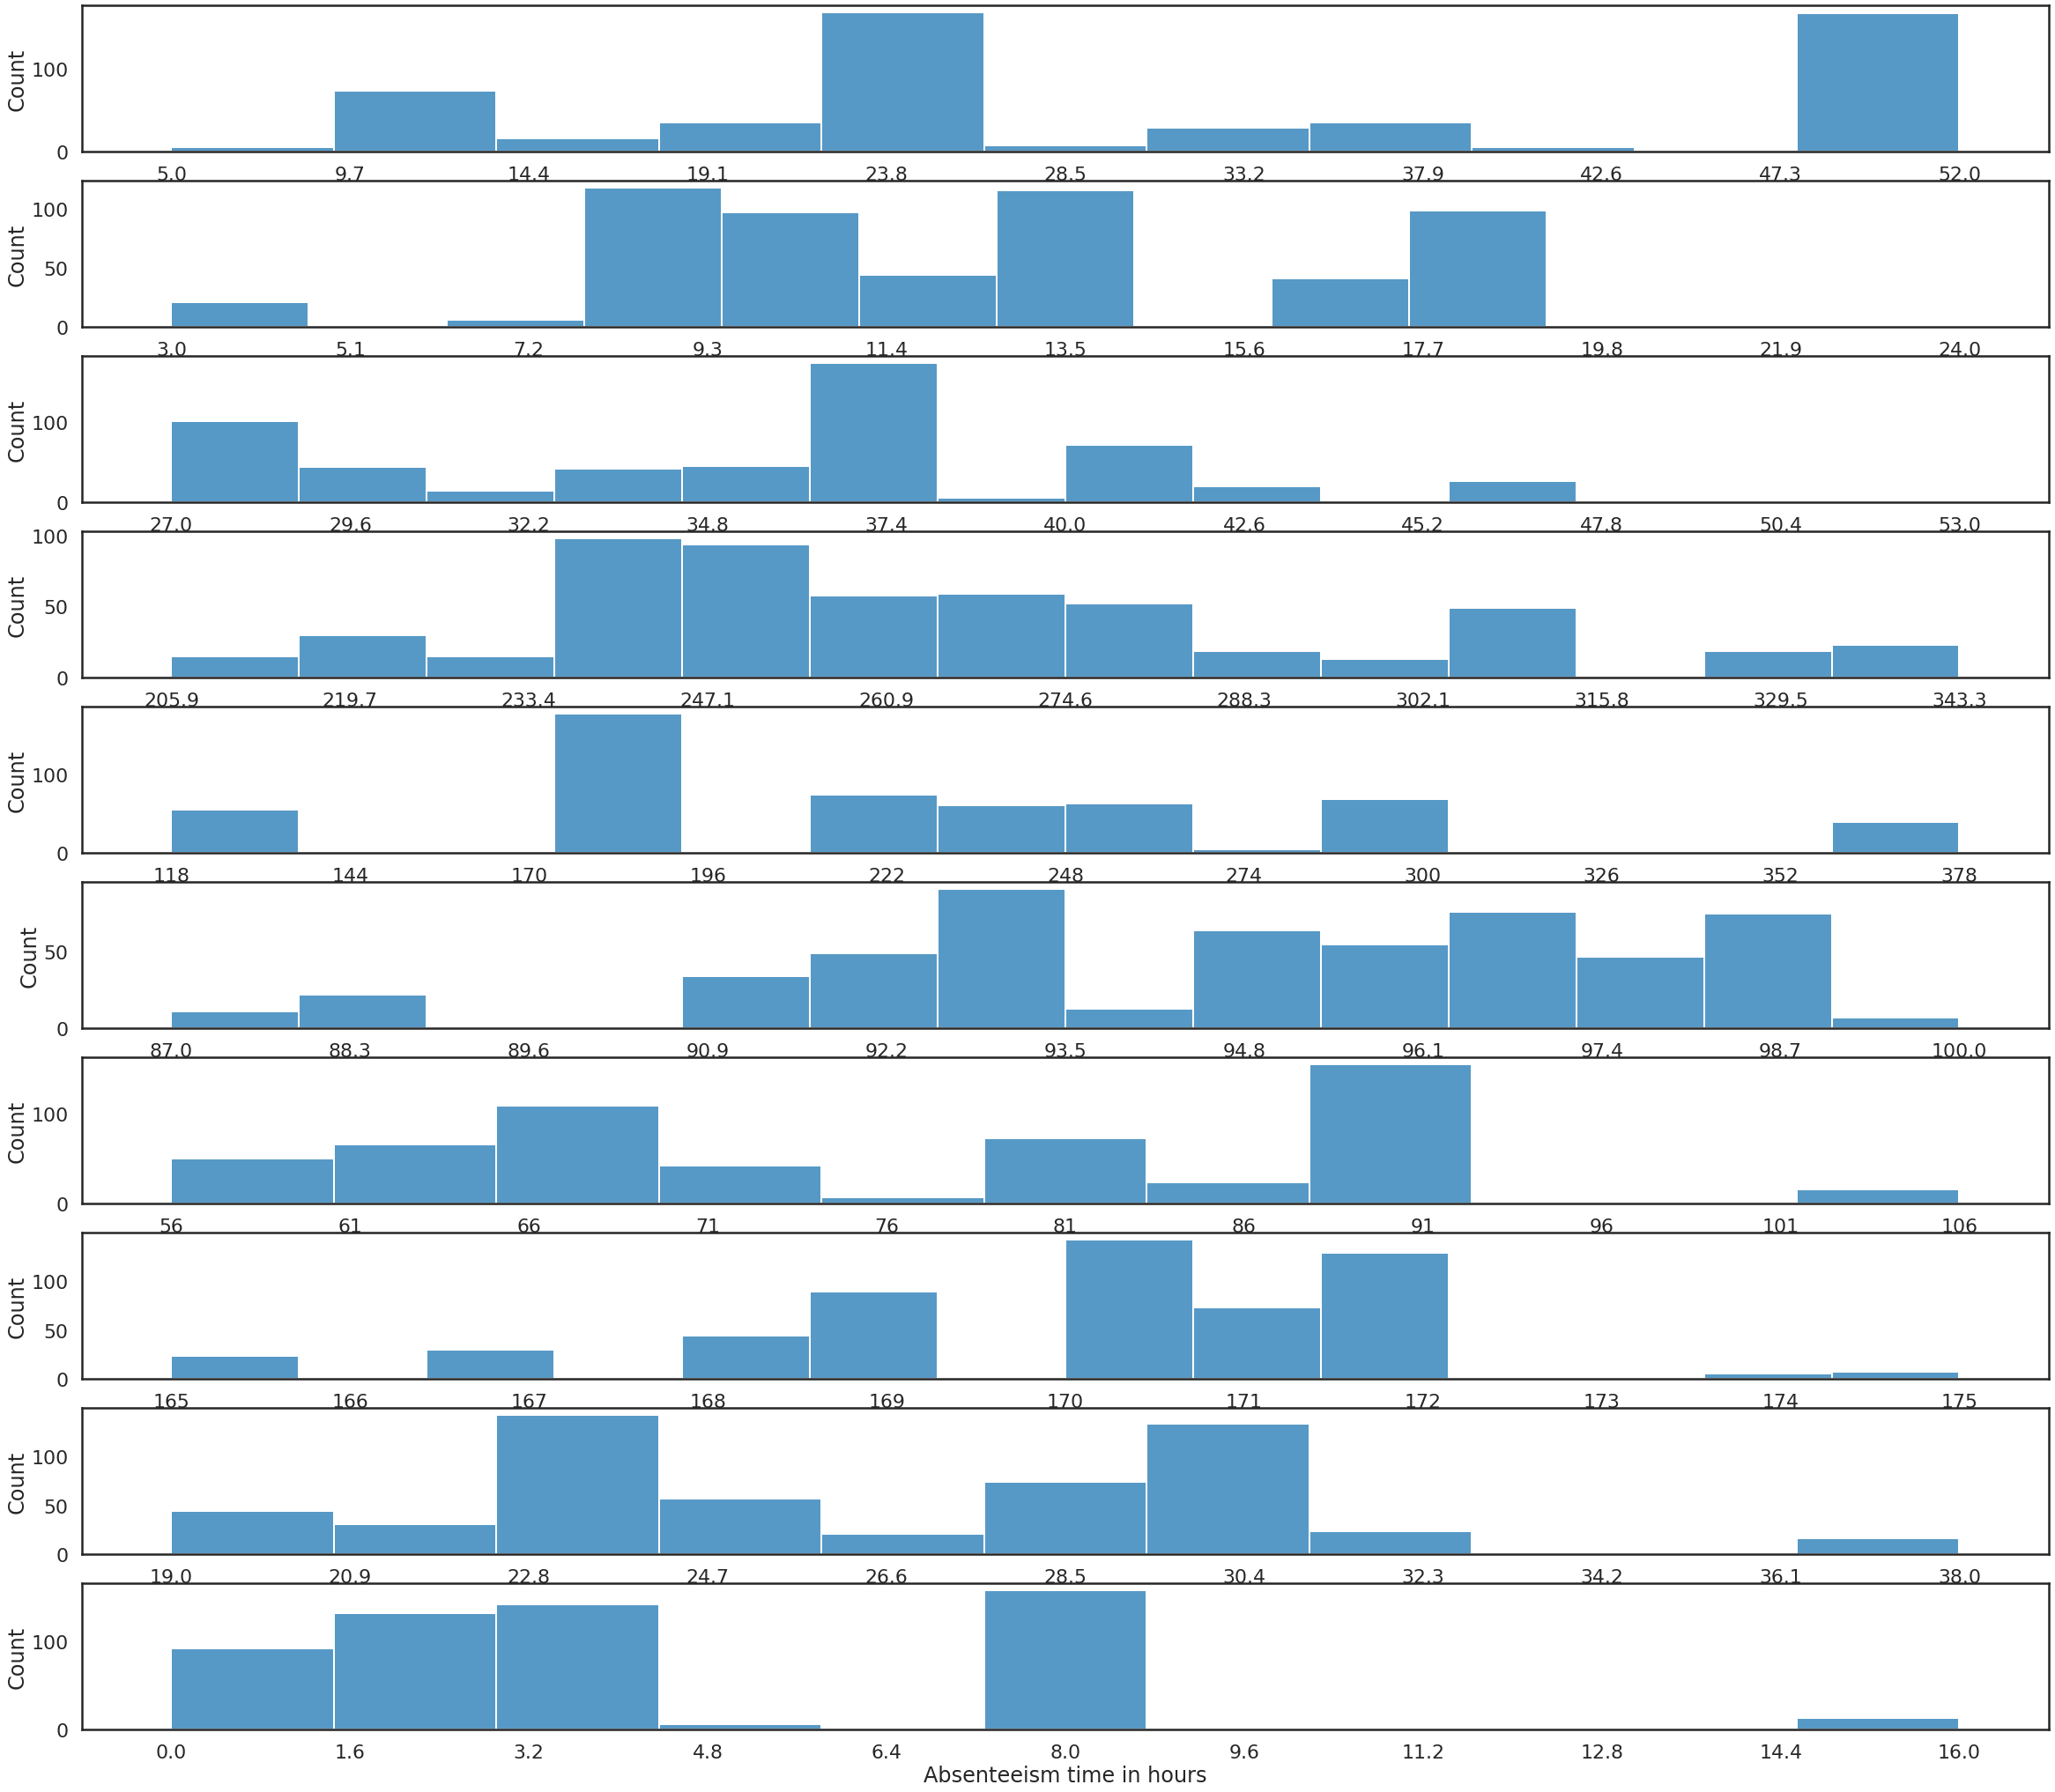

In [54]:
c=list(enumerate(cont_var))
plt.figure(figsize=(40,36))
for x in c:
    plt.subplot(10,1,x[0]+1)
    sns.histplot(x=ab_df[x[1]],bins='auto')
    plt.xticks(np.linspace(min(ab_df[x[1]]),max(ab_df[x[1]]),11)) 
plt.show()

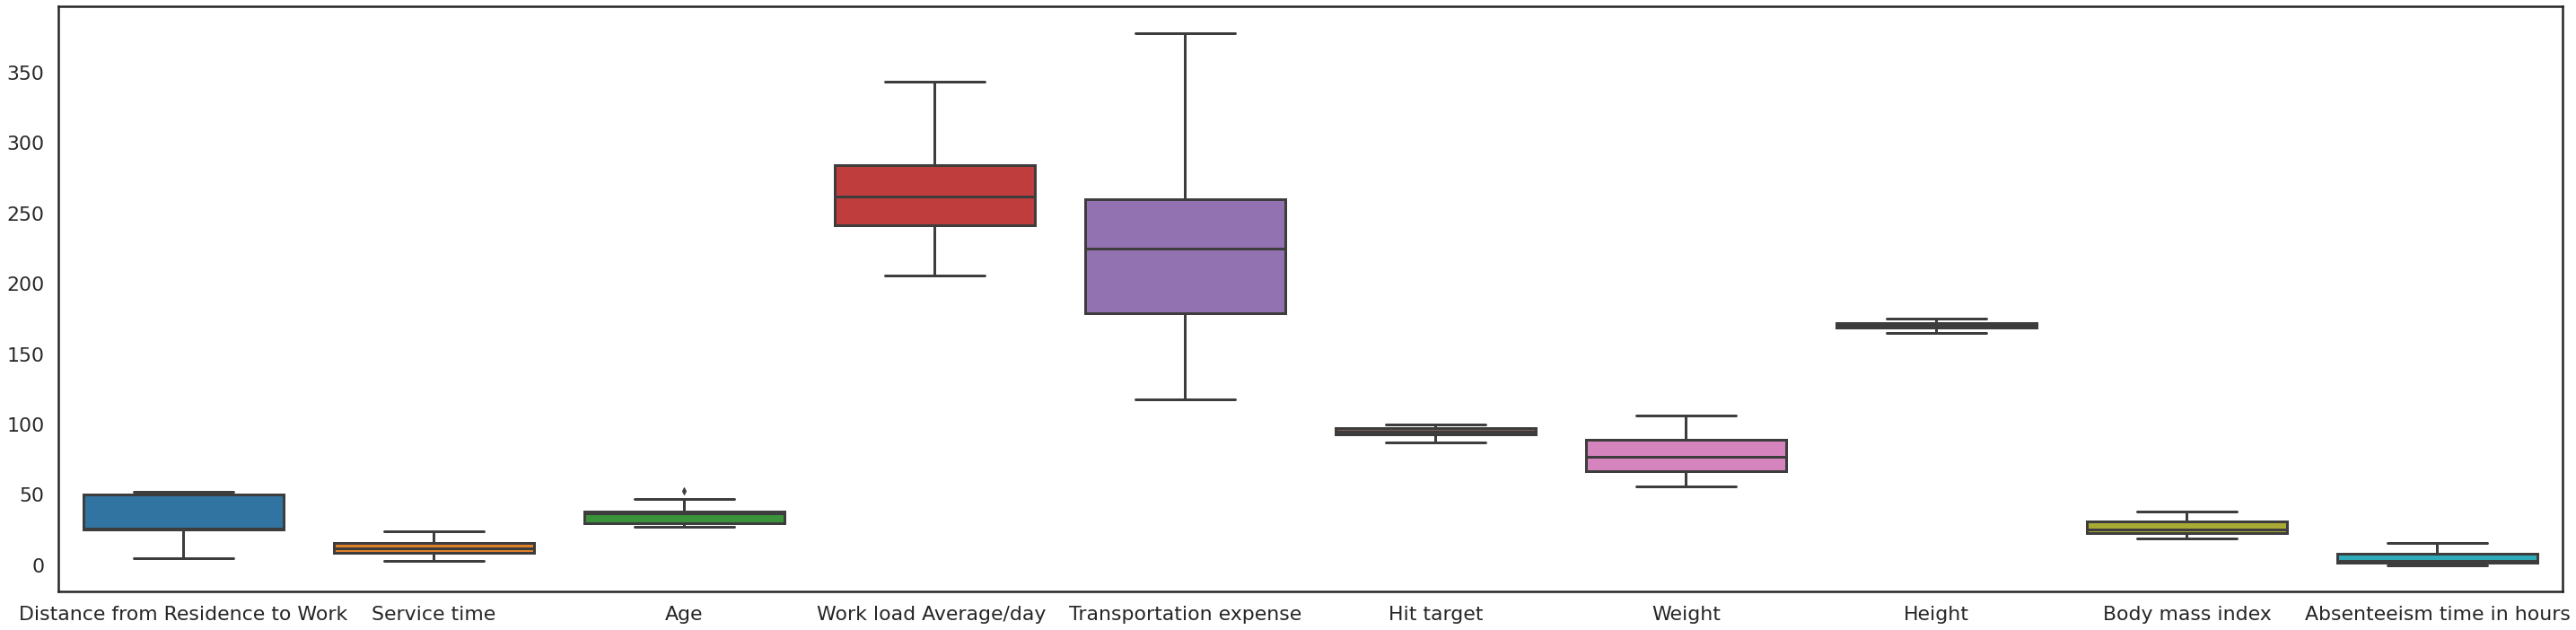

In [61]:
plt.figure(figsize=(50,12))
sns.boxplot(data=ab_df[cont_var])
plt.show()

## **Data Mining**

In [62]:
ab_num = ab_df.select_dtypes(include=np.number)
ab_num.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
0,289,36,13,33,239.554,97,90,172,30,4
2,179,51,18,38,239.554,97,89,170,31,2
3,279,5,14,39,239.554,97,68,168,24,4
4,289,36,13,33,239.554,97,90,172,30,2
5,179,51,18,38,239.554,97,89,170,31,2


- **K Means**

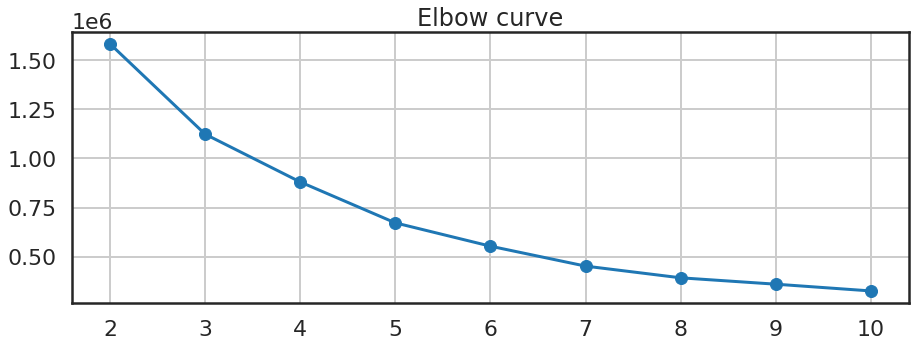

In [25]:
absent= []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k) #x axis
    kmeans.fit(ab_num)
    absent.append(kmeans.inertia_) #y axis

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), absent,marker='o')
plt.grid(True)
plt.title('Elbow curve');

number of clusters: 3
number of outliers: 0


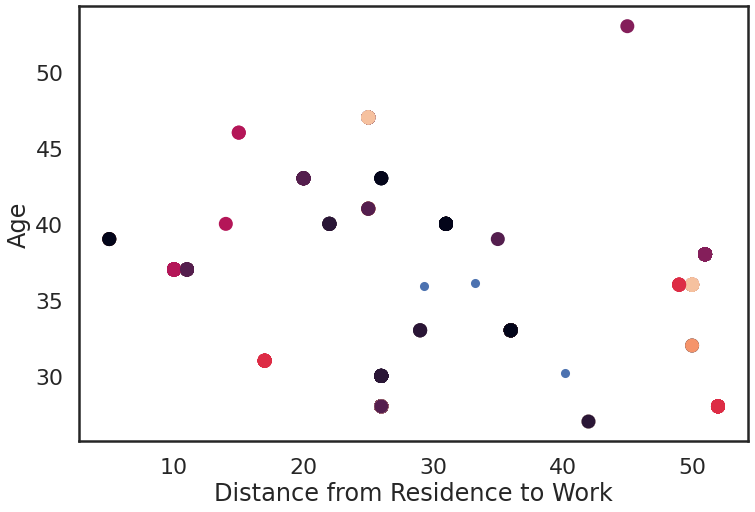

In [26]:
km = KMeans(n_clusters=3).fit(ab_num)

ab_num['Labels'] = km.labels_
centroids = km.cluster_centers_

labels_scale = km.labels_
n_clusters = labels_scale.max() + 1
n_outliers = np.sum(labels_scale == -1)
print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')

plt.figure(figsize=(12, 8))
plt.scatter(ab_num['Distance from Residence to Work'],ab_num['Age'], c= kmeans.labels_)
plt.scatter(centroids[:, 1], centroids[:, 3], c='b', s=50)

plt.xlabel('Distance from Residence to Work')
plt.ylabel('Age')
plt.show()

- **AGGLOMERATIVE HIERARCHICAL CLUSTERING**

For n_clusters = 3 The average silhouette_score is : 0.4029780399077572
For n_clusters = 4 The average silhouette_score is : 0.39067800355522475
For n_clusters = 5 The average silhouette_score is : 0.41736929974612413
For n_clusters = 6 The average silhouette_score is : 0.4006136886304039


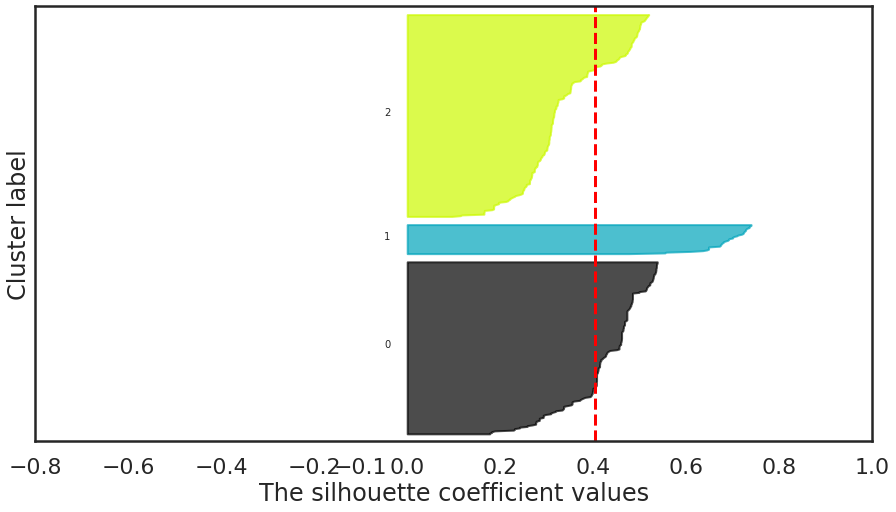

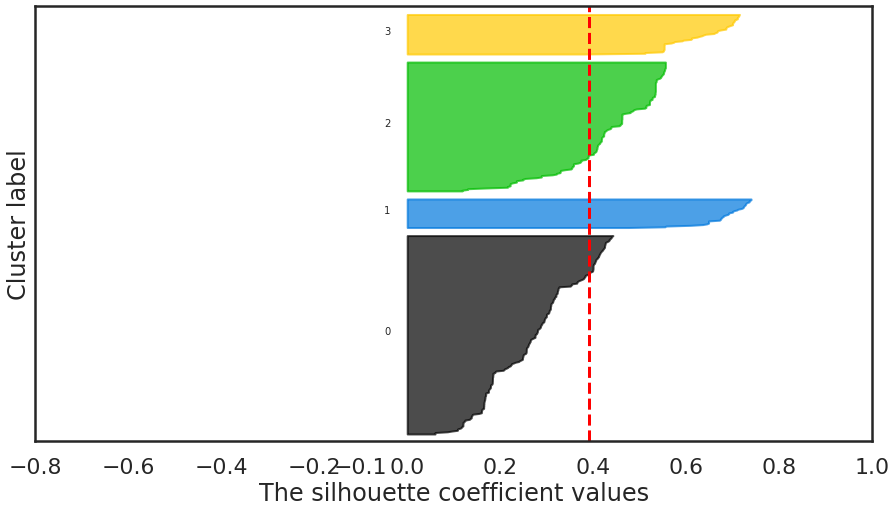

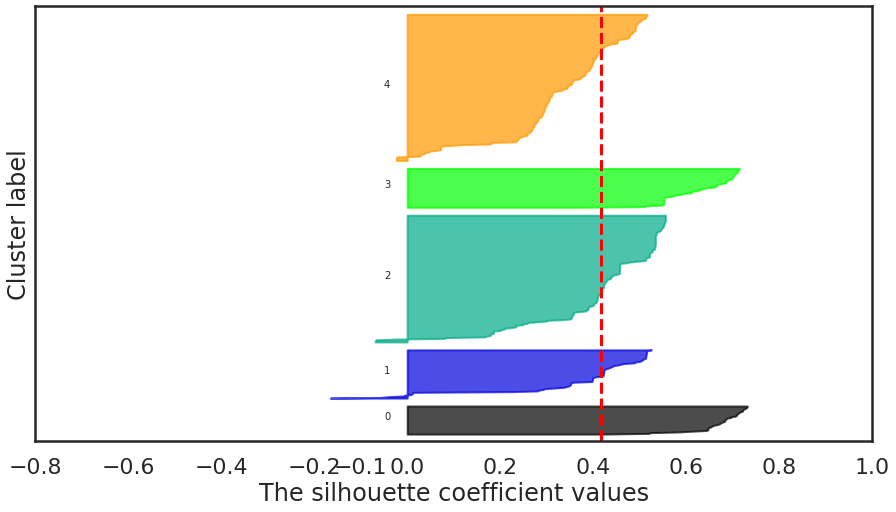

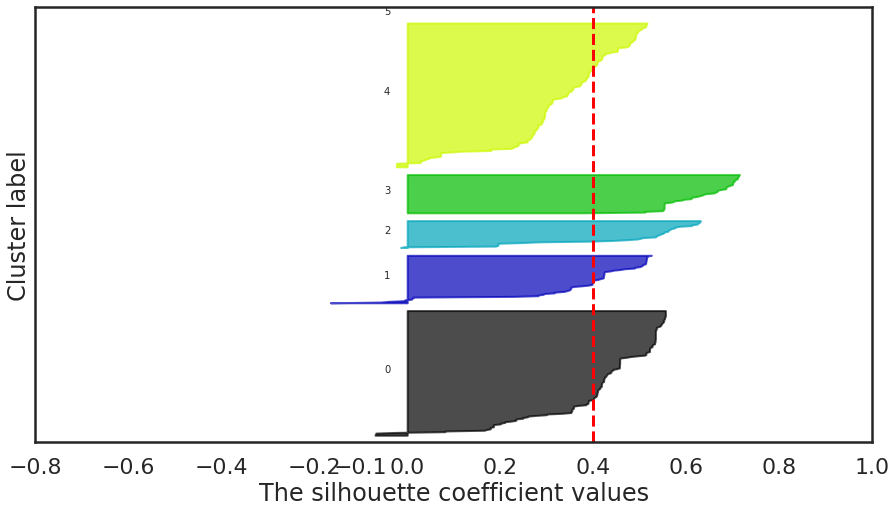

In [37]:
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1,figsize=(15,8))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(ab_num) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    cluster_labels = clusterer.fit_predict(ab_num)

    silhouette_avg = silhouette_score(ab_num, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(ab_num, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

number of clusters: 5
number of outliers: 0


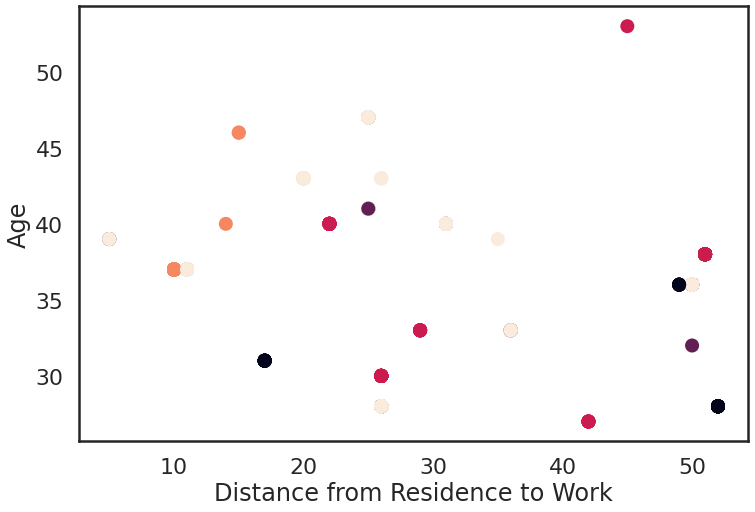

In [34]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='average').fit(ab_num)

labels_scale2 = agglo.labels_
n_clusters = labels_scale2.max() + 1
n_outliers = np.sum(labels_scale2 == -1)
print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')

plt.figure(figsize=(12, 8))
plt.scatter(ab_num['Distance from Residence to Work'],ab_num['Age'], c= labels_scale2)

plt.xlabel('Distance from Residence to Work')
plt.ylabel('Age')
plt.show()
 

- **DBSCAN**

In [29]:
def fit_and_plot_clustering(ab_num, clusterer,x,y, print_number=False):
    ab_num = ab_num.copy()
    ab_num['clusterid'] = clusterer.fit_predict(ab_num[[x, y]])
    n_clusters = ab_num['clusterid'].max() + 1
    n_outliers = np.sum(ab_num['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = ab_num.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return ab_num
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [69]:
def plot_dbscan(eps = 1.3, min_samples = 21):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    lable_df = fit_and_plot_clustering(ab_num, dbscan, 'Distance from Residence to Work', 'Age', print_number = True)
    
i = interact(plot_dbscan
            , eps = widgets.SelectionSlider(options = np.arange(0.9, 1.3, 0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(3, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…

## **Conclusion**
- Among the three algorithms used, DBSCAN was able to detect outliers and formed better clusters.

- KMeans and Agglomerative methods coud not detect any outlier.
